# Linear Regression Model (Change Categories for some Demographic Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
air_df = pd.read_csv('airnew.csv', encoding = 'latin-1')
air_df['survey_date'] = pd.to_datetime(air_df['survey_date'])
air_df.movie_name = air_df.movie_name.astype('category')
air_df.gender_name = air_df.gender_name.astype('category')
air_df.ethnicity_name = air_df.ethnicity_name.astype('category')
air_df.live_with_children = air_df.live_with_children.astype('category')
air_df.head(5)

,rating,survey_date,respondent_id,movie_id,movie_name,gender_name,age_group_bracket,ethnicity_name,education_level,income_bracket,household_size,is_favorite,respondent_movie_id,all_soon_as_available,all_looking_forward,all_total_attention,all_best_option,all_no_rewatch,all_yes_rewatch,all_none_above,all_aware_before_release,home_background,home_surfing_channels,home_go_to,home_sig_other,home_no_phone,home_yes_phone,home_bits_pieces,social_talk_others,social_yes_recommend,social_none_above,intent_raw,intent_score,wave_id,age,zip_code,live_with_children,watch_last,intelligent,real,fun,touching,relatable,sad,romantic,informative,mean,fake,glamorous,original,predictable,fresh,mindless,unrelatable,funny,imaginative,wholesome,inspiring,shallow,edgy,fastpaced,disturbing,dramatic,outrageous,exciting,calming,slow,unoriginal,uplifting,sexy,deep,suspenseful,thrilling,scary
0,4,2020-01-18,743006,11549,Ad Astra,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464319,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.703070,0.110210,191,64,85378,False,3 to 6 months,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,5,2020-01-18,743006,11679,Beetlejuice,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464318,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.703070,0.110210,191,64,85378,False,3 to 6 months,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,5,2020-01-18,743006,11692,Deliverance,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464315,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.859737,0.076891,191,64,85378,False,In the last year,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1
3,5,2020-01-18,743006,11708,Gremlins,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464324,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.859737,0.076891,191,64,85378,False,3 to 6 months,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0
4,3,2020-01-18,743006,11748,Risky Business,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464323,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.859737,0.076891,191,64,85378,False,In the last year,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0


## Create new Age_Category column

In [3]:
# Under 18 - 1
# 18 to 24 - 2
# 25 to 34 - 3
# 35 to 44 - 4
# 45 to 49 - 5
# 50 to 54 - 6
# 55 to 64 - 7
# 65 and Over - 8

conditions = [(air_df['age_group_bracket'] == 'Under 18'),
              (air_df['age_group_bracket'] == '18 to 24'),
              (air_df['age_group_bracket'] == '25 to 34'),
              (air_df['age_group_bracket'] == '35 to 44'),
              (air_df['age_group_bracket'] == '45 to 49'),
              (air_df['age_group_bracket'] == '50 to 54'),
              (air_df['age_group_bracket'] == '55 to 64'),
              (air_df['age_group_bracket'] == '65 and Over'),
]

values = [1, 2, 3, 4, 5, 6, 7, 8]

air_df['Age_Category'] = np.select(conditions, values)

## Create New Education Column

In [4]:
# Some High School - 1
# High School Diploma - 2
# Some College - 3
# College Degree - 4
# Some Higher Education - 5
# Higher Education - 6
# Prefer not to answer - 3

conditions = [(air_df['education_level'] == 'Some high school'),
              (air_df['education_level'] == 'High school diploma'),
              (air_df['education_level'] == 'Some college'),
              (air_df['education_level'] == 'College degree'),
              (air_df['education_level'] == 'Some higher education'),
              (air_df['education_level'] == 'Higher education'),
              (air_df['education_level'] == 'Prefer not to answer'),
             ]

values = [1, 2, 3, 4, 5, 6, 3]

air_df['Education'] = np.select(conditions, values)

## Create New Watch_Last Column

In [5]:
# The last week - 1
# 1 week to 1 month - 2
# 1 to 3 months - 3
# watch_last_3 to 6 months - 4
# In the last year - 5

conditions = [(air_df['watch_last'] == 'The last week'),
              (air_df['watch_last'] == '1 week to 1 month'),
              (air_df['watch_last'] == '1 to 3 months'),
              (air_df['watch_last'] == '3 to 6 months'),
              (air_df['watch_last'] == 'In the last year'),
             ]

values = [1, 2, 3, 4, 5]

air_df['Watch_Last'] = np.select(conditions, values)

## Create New Income Column

In [6]:
# Less than $15,000 - 1
# $15,000 - $24,999 - 2
# $25,000 - $34,999 - 3
# $35,000 - $49,999 - 4
# $50,000 - $74,999 - 5
# $75,000 - $99,999 - 6
# $100,000 - $149,999 - 7
# $150,000 - $249,999 - 8
# More than $250,000 - 9
# Prefer not to answer - 5

conditions = [(air_df['income_bracket'] == 'Less than $15,000'),
              (air_df['income_bracket'] == '$15,000 - $24,000'),
              (air_df['income_bracket'] == '$25,000 - $34,999'),
              (air_df['income_bracket'] == '$35,000 - $49,999'),
              (air_df['income_bracket'] == '$50,000 - $74,999'),
              (air_df['income_bracket'] == '$75,000 - $99,999'),
              (air_df['income_bracket'] == '$100,000 - $149,999'),
              (air_df['income_bracket'] == '$150,000 - $249,999'),
              (air_df['income_bracket'] == 'More than $250,000'),
              (air_df['income_bracket'] == 'Prefer not to answer'),
             ]

values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 5]

air_df['Income'] = np.select(conditions, values)

air_df.head(5)

,rating,survey_date,respondent_id,movie_id,movie_name,gender_name,age_group_bracket,ethnicity_name,education_level,income_bracket,household_size,is_favorite,respondent_movie_id,all_soon_as_available,all_looking_forward,all_total_attention,all_best_option,all_no_rewatch,all_yes_rewatch,all_none_above,all_aware_before_release,home_background,home_surfing_channels,home_go_to,home_sig_other,home_no_phone,home_yes_phone,home_bits_pieces,social_talk_others,social_yes_recommend,social_none_above,intent_raw,intent_score,wave_id,age,zip_code,live_with_children,watch_last,intelligent,real,fun,touching,relatable,sad,romantic,informative,mean,fake,glamorous,original,predictable,fresh,mindless,unrelatable,funny,imaginative,wholesome,inspiring,shallow,edgy,fastpaced,disturbing,dramatic,outrageous,exciting,calming,slow,unoriginal,uplifting,sexy,deep,suspenseful,thrilling,scary,Age_Category,Education,Watch_Last,Income
0,4,2020-01-18,743006,11549,Ad Astra,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464319,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.703070,0.110210,191,64,85378,False,3 to 6 months,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,7,3,4,6
1,5,2020-01-18,743006,11679,Beetlejuice,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464318,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.703070,0.110210,191,64,85378,False,3 to 6 months,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,3,4,6
2,5,2020-01-18,743006,11692,Deliverance,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464315,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.859737,0.076891,191,64,85378,False,In the last year,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,7,3,5,6
3,5,2020-01-18,743006,11708,Gremlins,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464324,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.859737,0.076891,191,64,85378,False,3 to 6 months,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,7,3,4,6
4,3,2020-01-18,743006,11748,Risky Business,Male,55 to 64,Hispanic or Latino,Some college,"$75,000 - $99,999",2,0,1464323,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,-0.859737,0.076891,191,64,85378,False,In the last year,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,7,3,5,6


## Create Dummy Variables

In [7]:
air_df = air_df.drop(['movie_name', 'survey_date', 'wave_id', 'zip_code', 'age', 'age_group_bracket',
                     'education_level', 'income_bracket', 'intent_raw', 'respondent_id', 'movie_id', 
                     'respondent_movie_id', 'watch_last'], axis=1)
air_df = pd.get_dummies(air_df, drop_first=True)
air_df.head(5)

,rating,is_favorite,all_soon_as_available,all_looking_forward,all_total_attention,all_best_option,all_no_rewatch,all_yes_rewatch,all_none_above,all_aware_before_release,home_background,home_surfing_channels,home_go_to,home_sig_other,home_no_phone,home_yes_phone,home_bits_pieces,social_talk_others,social_yes_recommend,social_none_above,intent_score,intelligent,real,fun,touching,relatable,sad,romantic,informative,mean,fake,glamorous,original,predictable,fresh,mindless,unrelatable,funny,imaginative,wholesome,inspiring,shallow,edgy,fastpaced,disturbing,dramatic,outrageous,exciting,calming,slow,unoriginal,uplifting,sexy,deep,suspenseful,thrilling,scary,Age_Category,Education,Watch_Last,Income,gender_name_Male,ethnicity_name_Asian,ethnicity_name_Decline to answer,ethnicity_name_Hispanic or Latino,ethnicity_name_Other (Specify:),ethnicity_name_White or Caucasian,household_size_2,household_size_3,household_size_4,household_size_5+,live_with_children_True
0,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.110210,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,7,3,4,6,1,0,0,1,0,0,1,0,0,0,0
1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.110210,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,7,3,4,6,1,0,0,1,0,0,1,0,0,0,0
2,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.076891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,7,3,5,6,1,0,0,1,0,0,1,0,0,0,0
3,5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.076891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,7,3,4,6,1,0,0,1,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.076891,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,7,3,5,6,1,0,0,1,0,0,1,0,0,0,0


## Stepwise Group 4

In [8]:
x_columns = ['Age_Category', 'household_size_4', 'ethnicity_name_Asian', 'home_surfing_channels', 'household_size_2',
              'scary', 'all_aware_before_release', 'home_bits_pieces', 'ethnicity_name_White or Caucasian', 'mean',
              'outrageous', 'ethnicity_name_Decline to answer', 'household_size_3', 'ethnicity_name_Other (Specify:)',
              'home_yes_phone', 'gender_name_Male', 'ethnicity_name_Hispanic or Latino', 'disturbing', 'household_size_5+']
y = air_df['rating']

In [9]:
import statsmodels.api as sm
def get_stats():
    x = air_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.899
Method:                 Least Squares   F-statistic:                          1.164e+05
Date:                Fri, 16 Apr 2021   Prob (F-statistic):                        0.00
Time:                        16:23:59   Log-Likelihood:                     -4.1914e+05
No. Observations:              249284   AIC:                                  8.383e+05
Df Residuals:                  249265   BIC:                                  8.385e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

## Stepwise Group 3

In [10]:
x_columns = ['uplifting', 'relatable', 'imaginative', 'funny', 'informative', 'romantic', 'home_sig_other', 'fastpaced',
             'wholesome', 'sexy', 'all_no_rewatch', 'sad', 'home_background', 'all_best_option', 'all_yes_rewatch', 'edgy',
             'glamorous', 'calming', 'live_with_children_True', 'Education', 'Income', 'household_size_4', 'Age_Category',
             'household_size_5+', 'household_size_3', 'ethnicity_name_White or Caucasian']
y = air_df['rating']

In [11]:
def get_stats():
    x = air_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.900
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                          8.607e+04
Date:                Fri, 16 Apr 2021   Prob (F-statistic):                        0.00
Time:                        16:24:00   Log-Likelihood:                     -4.1778e+05
No. Observations:              249284   AIC:                                  8.356e+05
Df Residuals:                  249258   BIC:                                  8.359e+05
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

## Stepwise Group 2

In [12]:
x_columns = ['unoriginal', 'social_talk_others', 'home_no_phone', 'slow', 'touching', 'inspiring', 'predictable', 'fake',
             'shallow', 'unrelatable', 'real', 'thrilling', 'deep', 'home_go_to', 'dramatic', 'mindless', 
             'all_looking_forward', 'all_soon_as_available', 'fun', 'suspenseful', 'fresh', 'Age_Category', 'Education', 
             'household_size_5+', 'household_size_3', 'household_size_4', 'funny']
y = air_df['rating']

In [13]:
def get_stats():
    x = air_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.907
Model:                            OLS   Adj. R-squared (uncentered):              0.907
Method:                 Least Squares   F-statistic:                          8.986e+04
Date:                Fri, 16 Apr 2021   Prob (F-statistic):                        0.00
Time:                        16:24:02   Log-Likelihood:                     -4.0867e+05
No. Observations:              249284   AIC:                                  8.174e+05
Df Residuals:                  249257   BIC:                                  8.177e+05
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

## Stepwise Group 1

In [14]:
x_columns = ['intent_score', 'social_none_above', 'social_yes_recommend', 'all_total_attention', 'exciting', 'Watch_Last',
             'all_none_above', 'original', 'intelligent', 'is_favorite', 'Age_Category', 'Education', 'household_size_5+',
             'household_size_3', 'household_size_4', 'funny', 'thrilling', 'suspenseful']
y = air_df['rating']

In [15]:
def get_stats():
    x = air_df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 rating   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.929
Method:                 Least Squares   F-statistic:                          1.801e+05
Date:                Fri, 16 Apr 2021   Prob (F-statistic):                        0.00
Time:                        16:24:02   Log-Likelihood:                     -3.7553e+05
No. Observations:              249284   AIC:                                  7.511e+05
Df Residuals:                  249266   BIC:                                  7.513e+05
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

## Create Training and Validation Set

In [16]:
predictors = ['intent_score', 'Education', 'Age_Category', 'Watch_Last', 'household_size_4', 'household_size_5+', 
              'social_none_above', 'funny', 'household_size_3', 'exciting', 'is_favorite', 'original', 
              'all_total_attention']
              
outcome = 'rating'

x = air_df[predictors]
y = air_df[outcome]
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

## Create Regression Model

In [17]:
air_lm = LinearRegression()
air_lm.fit(train_x, train_y)

print(pd.DataFrame({'Predictor':x.columns, 'coefficient': air_lm.coef_}))

regressionSummary(train_y, air_lm.predict(train_x))

              Predictor  coefficient
0          intent_score     0.869063
1             Education     0.008914
2          Age_Category     0.034641
3            Watch_Last    -0.116258
4      household_size_4     0.078886
5     household_size_5+     0.070286
6     social_none_above    -0.148652
7                 funny     0.179430
8      household_size_3     0.061551
9              exciting     0.296137
10          is_favorite     0.524635
11             original     0.259841
12  all_total_attention     0.104513

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.8928
            Mean Absolute Error (MAE) : 0.7184
          Mean Percentage Error (MPE) : -8.8432
Mean Absolute Percentage Error (MAPE) : 23.8105


## Test Model on Validation Set

In [18]:
air_lm_pred = air_lm.predict(valid_x)
result = pd.DataFrame({'Predicted': air_lm_pred, 'Actual': valid_y, 'Residual': valid_y - air_lm_pred})

print(result.head(10))

regressionSummary(valid_y, air_lm_pred)

        Predicted  Actual  Residual
141067   5.048544       5 -0.048544
127040   3.528746       3 -0.528746
55590    3.716721       5  1.283279
92616    3.910321       4  0.089679
49524    3.931071       3 -0.931071
730      3.336532       3 -0.336532
976      4.031084       5  0.968916
103041   3.686040       2 -1.686040
215799   3.734378       3 -0.734378
63960    3.403936       4  0.596064

Regression statistics

                      Mean Error (ME) : -0.0077
       Root Mean Squared Error (RMSE) : 0.8982
            Mean Absolute Error (MAE) : 0.7227
          Mean Percentage Error (MPE) : -9.2119
Mean Absolute Percentage Error (MAPE) : 24.1075


0.9728824437892373


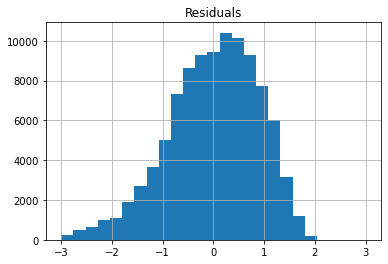

In [19]:
air_lm_pred = air_lm.predict(valid_x)
all_residuals = valid_y - air_lm_pred
print(len(all_residuals[(all_residuals > -2) & (all_residuals < 2)]) / len(all_residuals))

pd.DataFrame({'Residuals': all_residuals}).hist(bins=25, range=[-3, 3])
plt.show()

In [22]:
# Lift Chart

ax = liftChart(air_lm_pred)
ax.set_ylabel('Lift')

AttributeError: 'numpy.ndarray' object has no attribute 'groupby'